IGD: 0.02183907837533304
Run 1: IGD = 0.021839
IGD: 0.011351137342381239
Run 2: IGD = 0.011351
IGD: 0.01934437526130079
Run 3: IGD = 0.019344
Mejor resultado: Run 2 con IGD = 0.011351

IGD: 0.014202355573684924
Run 1: IGD = 0.014202
IGD: 0.014379524434631585
Run 2: IGD = 0.014380
IGD: 0.012053665137774028
Run 3: IGD = 0.012054
Mejor resultado: Run 3 con IGD = 0.012054

IGD: 0.06887961527494105
Run 1: IGD = 0.068880
IGD: 0.06788083683871399
Run 2: IGD = 0.067881
IGD: 0.07295579635770688
Run 3: IGD = 0.072956
Mejor resultado: Run 2 con IGD = 0.067881

IDG ZDT1: 0.018 ± 0.004
IDG ZDT3: 0.014 ± 0.001
IDG DTLZ2:0.070 ± 0.002
HV ZDT1: 0.875 ± 0.004
HV ZDT3: 1.070 ± 0.004
HV DTLZ2: 0.742 ± 0.015


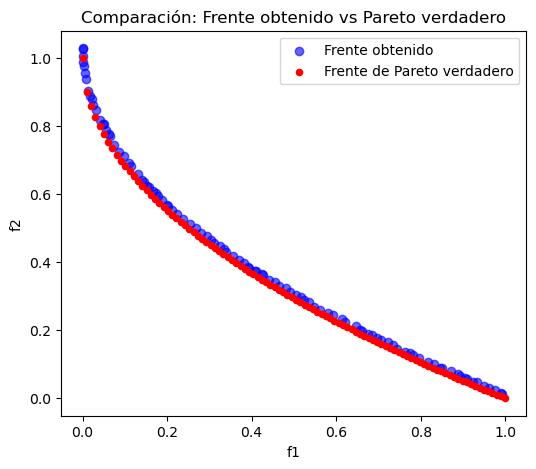

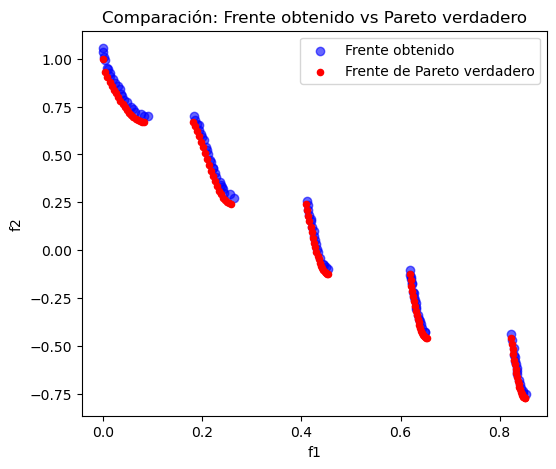

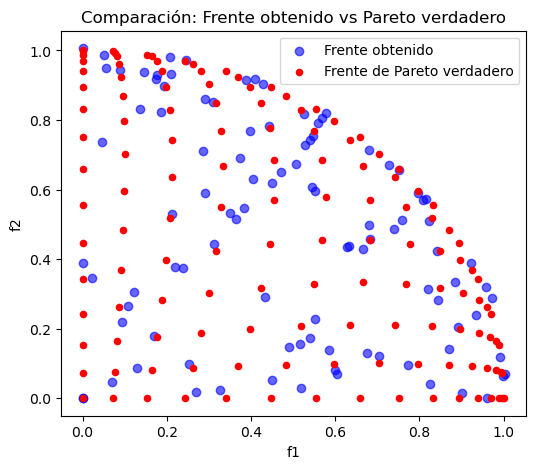

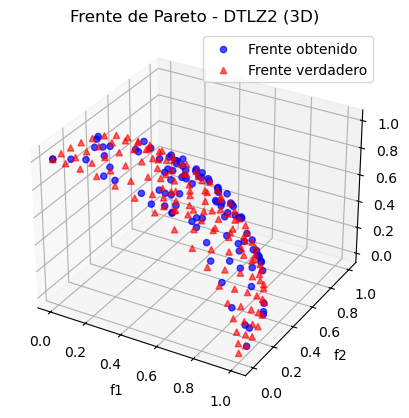

IGD: 0.020101585256171055
Run 1: IGD = 0.020102
IGD: 0.023683085864958944
Run 2: IGD = 0.023683
IGD: 0.02824026229202587
Run 3: IGD = 0.028240
Mejor resultado: Run 1 con IGD = 0.020102

IGD: 0.018256869372066952
Run 1: IGD = 0.018257
IGD: 0.018523854519375146
Run 2: IGD = 0.018524
IGD: 0.019928734500266186
Run 3: IGD = 0.019929
Mejor resultado: Run 1 con IGD = 0.018257

IGD: 0.048690612581037275
Run 1: IGD = 0.048691
IGD: 0.04793497316235857
Run 2: IGD = 0.047935
IGD: 0.048269973879966795
Run 3: IGD = 0.048270
Mejor resultado: Run 2 con IGD = 0.047935

IGD ZDT1: 0.024 ± 0.003
IGD ZDT3: 0.019 ± 0.001
IGD DTLZ2: 0.048 ± 0.000
HV ZDT1: 0.846 ± 0.056
HV ZDT3: 1.083 ± 0.012
HV DTLZ2: 0.767 ± 0.008


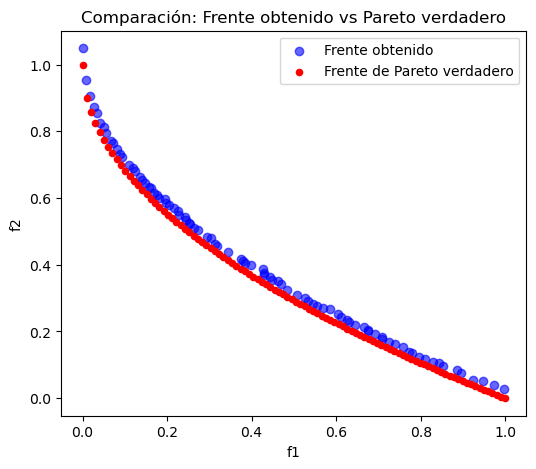

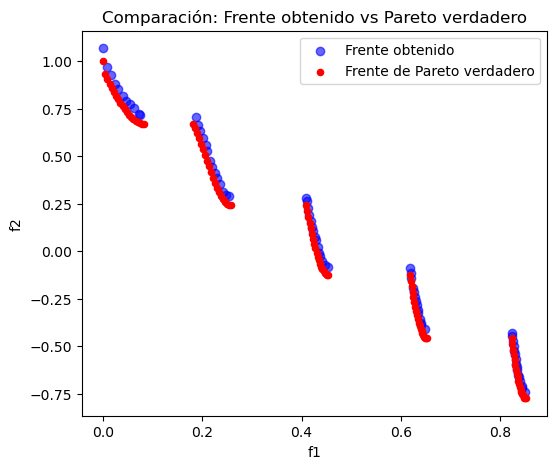

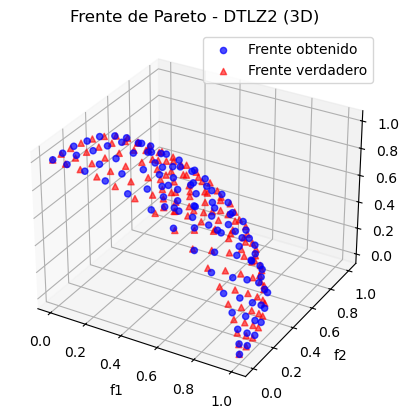

IGD: 0.06680819205202906
Run 1: IGD = 0.066808
IGD: 0.034418648724759596
Run 2: IGD = 0.034419
IGD: 0.04408991593608125
Run 3: IGD = 0.044090
Mejor resultado: Run 2 con IGD = 0.034419

IGD: 0.02491909986709552
Run 1: IGD = 0.024919
IGD: 0.11297167673661136
Run 2: IGD = 0.112972
IGD: 0.01735247130994884
Run 3: IGD = 0.017352
Mejor resultado: Run 3 con IGD = 0.017352

IGD: 0.04959061726070303
Run 1: IGD = 0.049591
IGD: 0.049092013002576616
Run 2: IGD = 0.049092
IGD: 0.04883037060746062
Run 3: IGD = 0.048830
Mejor resultado: Run 3 con IGD = 0.048830

MOEA/D IGD ZDT1: 0.048 ± 0.014
MOEA/D IGD ZDT3: 0.052 ± 0.043
MOEA/D IGD DTLZ2: 0.049 ± 0.000
MOEA/D HV ZDT1: 1.369 ± 0.873
MOEA/D HV ZDT3: 1.268 ± 0.209
MOEA/D HV DTLZ2: 0.761 ± 0.007


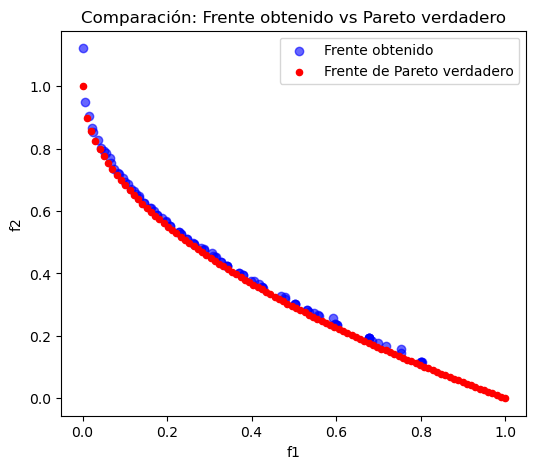

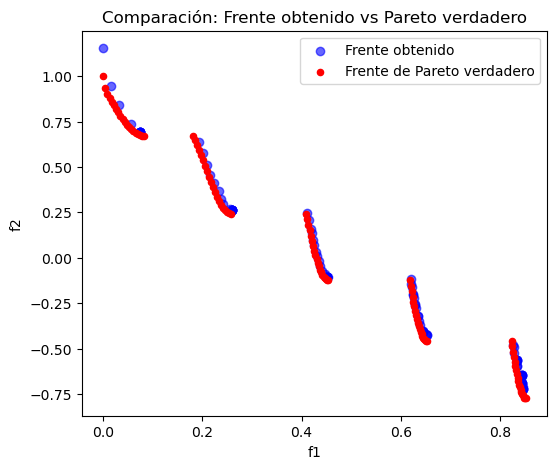

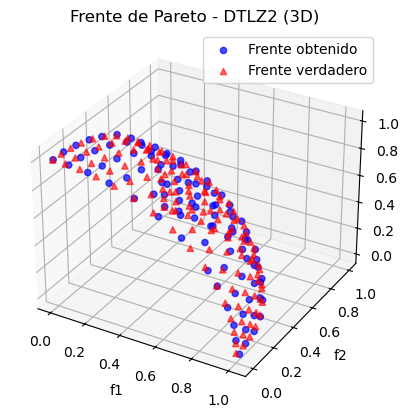

In [1]:
#========NSGAII===========
# %%
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# %%
def NSGAII(problem): 
    algorithm = NSGA2(pop_size=100)
    # Ejecutar múltiples veces
    results = []
    for seed in [42, 123, 456]:
        res = minimize(problem, #todos los probelmas a probar son de minimizar
                   algorithm,
                   ('n_gen', 100),  # 10k evaluaciones / 100 pop
                   seed=seed,
                   verbose=False)
        results.append(res)
    return results

# %%
def get_X_F (result):
    '''Obtiene variables de decisión y variables de los objetivos'''
    # Variables de decisión
    X = result.X
    # Valores de los objetivos
    F = result.F
    return X, F

# %%
def calculate_igd (problem, F):
    '''Calcula IGD del frente de pareto'''
    pf = problem.pareto_front()
    igd = IGD(pf)
    igd_value = igd(F)
    print("IGD:", igd_value)
    return igd_value

# %%
def calculate_hypervolume(F):
    '''Calcula hipervolumen'''
    # Definir punto de referencia (un poco mayor que el máximo de F)
    ref_point = np.max(F, axis=0) + 0.1

    hv = HV(ref_point=ref_point)
    hv_value = hv(F)
    return hv_value

# %%
def get_best_result(results, problem):
    """
    Selecciona el mejor resultado (menor IGD) entre múltiples ejecuciones.
    """
    igd_values = []

    # Calcular IGD para cada resultado
    for i, res in enumerate(results):
        igd_val = calculate_igd(problem, res.F)
        igd_values.append(igd_val)
        print(f"Run {i+1}: IGD = {igd_val:.6f}")

    # Elegir el índice del mejor (menor IGD)
    best_index = int(np.argmin(igd_values))
    best_res = results[best_index]
    best_igd = igd_values[best_index]

    print(f"Mejor resultado: Run {best_index+1} con IGD = {best_igd:.6f}\n")
    return best_res, best_igd, igd_values


# %%
def plot_pareto(problem, F): 
    ''''Grafica Frente de pareto verdadero vs Frente de pareto obtenido'''
    
    # Frente de Pareto verdadero
    pf = problem.pareto_front()

    # Graficar ambos
    plt.figure(figsize=(6, 5))
    plt.scatter(F[:, 0], F[:, 1], color='blue', label='Frente obtenido', alpha=0.6)
    plt.scatter(pf[:, 0], pf[:, 1], color='red', label='Frente de Pareto verdadero', s=20)
    plt.xlabel("f1")
    plt.ylabel("f2")
    plt.title("Comparación: Frente obtenido vs Pareto verdadero")
    plt.legend()
    plt.show()


# %%
def plot_pareto_3D(problem, F):
    """
    Grafica el frente de Pareto obtenido y el frente de Pareto verdadero para problemas con 3 objetivos.
    """

    # Frente de Pareto verdadero
    pf = problem.pareto_front()

    # Crear figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Frentes
    ax.scatter(F[:, 0], F[:, 1], F[:, 2],
               c='blue', label='Frente obtenido', alpha=0.7)
    ax.scatter(pf[:, 0], pf[:, 1], pf[:, 2],
               c='red', marker='^', label='Frente verdadero', alpha=0.6)

    # Etiquetas
    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_zlabel("f3")
    ax.set_title("Frente de Pareto - DTLZ2 (3D)")
    ax.legend()
    plt.show()



# %%
'''
ZDT1 (bi-objetivo, convexa)
ZDT3 (bi-objetivo, discontinua)
DTLZ2 (tri-objetivo, esférica)
'''
#resolvemos los 3 problemas
#Nos regresa un array de 3 soluciones para cada problmea
res_zdt1= NSGAII(get_problem("zdt1"))
res_zdt3= NSGAII(get_problem ("zdt3"))
res_dtlz2= NSGAII(get_problem("dtlz2"))

# %%
#Con el IGD obtenemso la mejor de las 3 soluciones para cada problema, y el conjunto el igds calculado. 
best_zdt1, _ , igds_zdt1= get_best_result(res_zdt1, get_problem("zdt1"))
best_zdt3, _, igds_zdt3= get_best_result(res_zdt3, get_problem("zdt3"))
best_dtlz2 ,_ , igds_dtlz2= get_best_result(res_dtlz2, get_problem("dtlz2"))

# %%
print (f"IDG ZDT1: {np.mean(igds_zdt1):.3f} ± {np.std(igds_zdt1):.3f}")
print (f"IDG ZDT3: {np.mean(igds_zdt3):.3f} ± {np.std(igds_zdt3):.3f}")
print (f"IDG DTLZ2:{np.mean(igds_dtlz2):.3f} ± {np.std(igds_dtlz2):.3f}")


# %%
#hipervolumen
hvs_zdt1= []
for res in res_zdt1:  
    _,F_zdt1= get_X_F(res)
    hv= calculate_hypervolume(F_zdt1)
    hvs_zdt1.append(hv)

hvs_zdt3= []
for res in res_zdt3:  
    _,F_zdt3= get_X_F(res)
    hv= calculate_hypervolume(F_zdt3)
    hvs_zdt3.append(hv)

hvs_dtlz2= []
for res in res_dtlz2:  
    _,F_dtlz2= get_X_F(res)
    hv= calculate_hypervolume(F_dtlz2)
    hvs_dtlz2.append(hv)

print(f"HV ZDT1: {np.mean(hvs_zdt1):.3f} ± {np.std(hvs_zdt1):.3f}")
print(f"HV ZDT3: {np.mean(hvs_zdt3):.3f} ± {np.std(hvs_zdt3):.3f}")
print(f"HV DTLZ2: {np.mean(hvs_dtlz2):.3f} ± {np.std(hvs_dtlz2):.3f}")



# %%
#obtenemos las variables de decisión (x1, x2,...) y variables de los objetivos (f1, f2...)
X_zdt1,F_zdt1= get_X_F(best_zdt1)
X_zdt3,F_zdt3= get_X_F(best_zdt3)
X_dtlz2,F_dtlz2= get_X_F(best_dtlz2)

# %%
#plot
plot_pareto(get_problem("zdt1"), F_zdt1)
plot_pareto(get_problem("zdt3"), F_zdt3)
plot_pareto(get_problem("dtlz2"), F_dtlz2)
plot_pareto_3D(get_problem("dtlz2"), F_dtlz2)
#========NSGAIII===========
# %%
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.termination import get_termination

# %%
def run_nsga3(problem, pop=100, seeds=(42,123,456), n_evals=10000):
    # Generar ref_dirs acorde a # de objetivos y tamaño deseado
    ref_dirs = get_reference_directions("das-dennis", n_dim=problem.n_obj, n_points=pop)
    algorithm = NSGA3(ref_dirs=ref_dirs, pop_size=len(ref_dirs))

    # Terminar por número de evaluaciones exacto (mejor que n_gen cuando cambia pop_size)
    termination = get_termination("n_eval", n_evals)

    results = []
    for seed in seeds:
        res = minimize(problem, algorithm, termination, seed=seed, verbose=False)
        results.append(res)
    return results

# %%
def get_X_F (result):
    '''Obtiene variables de decisión y variables de los objetivos'''
    # Variables de decisión
    X = result.X
    # Valores de los objetivos
    F = result.F
    return X, F

# %%
def calculate_igd (problem, F):
    '''Calcula IGD del frente de pareto'''
    pf = problem.pareto_front()
    igd = IGD(pf)
    igd_value = igd(F)
    print("IGD:", igd_value)
    return igd_value

# %%
def calculate_hypervolume(F):
    '''Calcula hipervolumen'''
    # Definir punto de referencia (un poco mayor que el máximo de F)
    ref_point = np.max(F, axis=0) + 0.1

    hv = HV(ref_point=ref_point)
    hv_value = hv(F)
    return hv_value

# %%
def get_best_result(results, problem):
    """
    Selecciona el mejor resultado (menor IGD) entre múltiples ejecuciones.
    """
    igd_values = []

    # Calcular IGD para cada resultado
    for i, res in enumerate(results):
        igd_val = calculate_igd(problem, res.F)
        igd_values.append(igd_val)
        print(f"Run {i+1}: IGD = {igd_val:.6f}")

    # Elegir el índice del mejor (menor IGD)
    best_index = int(np.argmin(igd_values))
    best_res = results[best_index]
    best_igd = igd_values[best_index]

    print(f"Mejor resultado: Run {best_index+1} con IGD = {best_igd:.6f}\n")
    return best_res, best_igd, igd_values


# %%
def plot_pareto(problem, F): 
    ''''Grafica Frente de pareto verdadero vs Frente de pareto obtenido'''
    
    # Frente de Pareto verdadero
    pf = problem.pareto_front()

    # Graficar ambos
    plt.figure(figsize=(6, 5))
    plt.scatter(F[:, 0], F[:, 1], color='blue', label='Frente obtenido', alpha=0.6)
    plt.scatter(pf[:, 0], pf[:, 1], color='red', label='Frente de Pareto verdadero', s=20)
    plt.xlabel("f1")
    plt.ylabel("f2")
    plt.title("Comparación: Frente obtenido vs Pareto verdadero")
    plt.legend()
    plt.show()


# %%
def plot_pareto_3D(problem, F):
    """
    Grafica el frente de Pareto obtenido y el frente de Pareto verdadero para problemas con 3 objetivos.
    """

    # Frente de Pareto verdadero
    pf = problem.pareto_front()

    # Crear figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Frentes
    ax.scatter(F[:, 0], F[:, 1], F[:, 2],
               c='blue', label='Frente obtenido', alpha=0.7)
    ax.scatter(pf[:, 0], pf[:, 1], pf[:, 2],
               c='red', marker='^', label='Frente verdadero', alpha=0.6)

    # Etiquetas
    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_zlabel("f3")
    ax.set_title("Frente de Pareto - DTLZ2 (3D)")
    ax.legend()
    plt.show()



# %%
'''
ZDT1 (bi-objetivo, convexa)
ZDT3 (bi-objetivo, discontinua)
DTLZ2 (tri-objetivo, esférica)
'''
#resolvemos los 3 problemas
#Nos regresa un array de 3 soluciones para cada problmea
# ZDT (bi-objetivo) → pop=100 funciona bien
res_zdt1 = run_nsga3(get_problem("zdt1"), pop=100)
res_zdt3 = run_nsga3(get_problem("zdt3"), pop=100)

# DTLZ2 (tri-objetivo) → usa pop permitido: 105 (o 91)
res_dtlz2 = run_nsga3(get_problem("dtlz2", n_obj=3), pop=105)

# %%
#Con el IGD obtenemso la mejor de las 3 soluciones para cada problema, y el conjunto el igds calculado. 
best_zdt1, _, igds_zdt1 = get_best_result(res_zdt1, get_problem("zdt1"))
best_zdt3, _, igds_zdt3 = get_best_result(res_zdt3, get_problem("zdt3"))
best_dtlz2, _, igds_dtlz2 = get_best_result(res_dtlz2, get_problem("dtlz2", n_obj=3))

# %%
print(f"IGD ZDT1: {np.mean(igds_zdt1):.3f} ± {np.std(igds_zdt1):.3f}")
print(f"IGD ZDT3: {np.mean(igds_zdt3):.3f} ± {np.std(igds_zdt3):.3f}")
print(f"IGD DTLZ2: {np.mean(igds_dtlz2):.3f} ± {np.std(igds_dtlz2):.3f}")


# %%
#hipervolumen
hvs_zdt1= []
hvs_zdt1 = [calculate_hypervolume(r.F) for r in res_zdt1]
hvs_zdt3 = [calculate_hypervolume(r.F) for r in res_zdt3]
hvs_dtlz2 = [calculate_hypervolume(r.F) for r in res_dtlz2]
print(f"HV ZDT1: {np.mean(hvs_zdt1):.3f} ± {np.std(hvs_zdt1):.3f}")
print(f"HV ZDT3: {np.mean(hvs_zdt3):.3f} ± {np.std(hvs_zdt3):.3f}")
print(f"HV DTLZ2: {np.mean(hvs_dtlz2):.3f} ± {np.std(hvs_dtlz2):.3f}")



# %%
#obtenemos las variables de decisión (x1, x2,...) y variables de los objetivos (f1, f2...)
_, F_zdt1 = get_X_F(best_zdt1)
_, F_zdt3 = get_X_F(best_zdt3)
_, F_dtlz2 = get_X_F(best_dtlz2)

# %%
#plot
plot_pareto(get_problem("zdt1"), F_zdt1)
plot_pareto(get_problem("zdt3"), F_zdt3)
plot_pareto_3D(get_problem("dtlz2", n_obj=3), F_dtlz2)
#========MOEA/D===========
# %%
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.problems import get_problem
from pymoo.termination import get_termination
from pymoo.optimize import minimize
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
import matplotlib.pyplot as plt
import numpy as np

# %%
def run_moead(problem, pop=100, seeds=(42,123,456), n_evals=10000):
    # 1) Direcciones de referencia = número de subproblemas = pop
    try:
        ref_dirs = get_reference_directions("das-dennis", n_dim=problem.n_obj, n_points=pop)
    except Exception:
        ref_dirs = get_reference_directions("energy", n_dim=problem.n_obj, n_points=pop)

    # 2) Operadores
    cx  = SBX(prob=1.0, eta=15)
    mut = PM(eta=20)

    # 3) Construcción del algoritmo (SIN 'decomposition=' → usa Tchebycheff por defecto)
    algorithm = MOEAD(
        ref_dirs=ref_dirs,
        n_neighbors=15,
        prob_neighbor_mating=0.9,
        crossover=cx,
        mutation=mut,
        verbose=False
    )

    # 4) Terminación
    termination = get_termination("n_eval", n_evals)

    # 5) Ejecuciones independientes
    results = []
    for s in seeds:
        res = minimize(problem, algorithm, termination, seed=s, verbose=False)
        results.append(res)

    return results

# %%
def get_X_F (result):
    '''Obtiene variables de decisión y variables de los objetivos'''
    # Variables de decisión
    X = result.X
    # Valores de los objetivos
    F = result.F
    return X, F

# %%
def calculate_igd (problem, F):
    '''Calcula IGD del frente de pareto'''
    pf = problem.pareto_front()
    igd = IGD(pf)
    igd_value = igd(F)
    print("IGD:", igd_value)
    return igd_value

# %%
def calculate_hypervolume(F):
    '''Calcula hipervolumen'''
    # Definir punto de referencia (un poco mayor que el máximo de F)
    ref_point = np.max(F, axis=0) + 0.1

    hv = HV(ref_point=ref_point)
    hv_value = hv(F)
    return hv_value

# %%
def get_best_result(results, problem):
    """
    Selecciona el mejor resultado (menor IGD) entre múltiples ejecuciones.
    """
    igd_values = []

    # Calcular IGD para cada resultado
    for i, res in enumerate(results):
        igd_val = calculate_igd(problem, res.F)
        igd_values.append(igd_val)
        print(f"Run {i+1}: IGD = {igd_val:.6f}")

    # Elegir el índice del mejor (menor IGD)
    best_index = int(np.argmin(igd_values))
    best_res = results[best_index]
    best_igd = igd_values[best_index]

    print(f"Mejor resultado: Run {best_index+1} con IGD = {best_igd:.6f}\n")
    return best_res, best_igd, igd_values


# %%
def plot_pareto(problem, F): 
    ''''Grafica Frente de pareto verdadero vs Frente de pareto obtenido'''
    
    # Frente de Pareto verdadero
    pf = problem.pareto_front()

    # Graficar ambos
    plt.figure(figsize=(6, 5))
    plt.scatter(F[:, 0], F[:, 1], color='blue', label='Frente obtenido', alpha=0.6)
    plt.scatter(pf[:, 0], pf[:, 1], color='red', label='Frente de Pareto verdadero', s=20)
    plt.xlabel("f1")
    plt.ylabel("f2")
    plt.title("Comparación: Frente obtenido vs Pareto verdadero")
    plt.legend()
    plt.show()


# %%
def plot_pareto_3D(problem, F):
    """
    Grafica el frente de Pareto obtenido y el frente de Pareto verdadero para problemas con 3 objetivos.
    """

    # Frente de Pareto verdadero
    pf = problem.pareto_front()

    # Crear figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Frentes
    ax.scatter(F[:, 0], F[:, 1], F[:, 2],
               c='blue', label='Frente obtenido', alpha=0.7)
    ax.scatter(pf[:, 0], pf[:, 1], pf[:, 2],
               c='red', marker='^', label='Frente verdadero', alpha=0.6)

    # Etiquetas
    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_zlabel("f3")
    ax.set_title("Frente de Pareto - DTLZ2 (3D)")
    ax.legend()
    plt.show()



# %%
'''
ZDT1 (bi-objetivo, convexa)
ZDT3 (bi-objetivo, discontinua)
DTLZ2 (tri-objetivo, esférica)
'''
#resolvemos los 3 problemas
#Nos regresa un array de 3 soluciones para cada problmea
# ZDT1 y ZDT3 (bi-objetivo)
res_zdt1_moead = run_moead(get_problem("zdt1"), pop=100, seeds=(42,123,456), n_evals=10000)
res_zdt3_moead = run_moead(get_problem("zdt3"), pop=100, seeds=(42,123,456), n_evals=10000)

# DTLZ2 con 3 objetivos (manteniendo pop=100; usa fallback 'energy' si hace falta)
res_dtlz2_moead = run_moead(get_problem("dtlz2", n_obj=3), pop=100, seeds=(42,123,456), n_evals=10000)

# %%
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV
# Selección por IGD, métricas y plots (con tus helpers)
best_zdt1_m, igd_best, igds = get_best_result(res_zdt1_moead, get_problem("zdt1"))
best_zdt3_m, _, igds3 = get_best_result(res_zdt3_moead, get_problem("zdt3"))
best_dtlz2_m, _, igdsd = get_best_result(res_dtlz2_moead, get_problem("dtlz2", n_obj=3))

# %%
print(f"MOEA/D IGD ZDT1: {np.mean(igds):.3f} ± {np.std(igds):.3f}")
print(f"MOEA/D IGD ZDT3: {np.mean(igds3):.3f} ± {np.std(igds3):.3f}")
print(f"MOEA/D IGD DTLZ2: {np.mean(igdsd):.3f} ± {np.std(igdsd):.3f}")


# %%
# Hypervolume (si comparas entre ejecuciones, usa un ref_point fijo por problema)
hvs_zdt1_m = [calculate_hypervolume(r.F) for r in res_zdt1_moead]
hvs_zdt3_m = [calculate_hypervolume(r.F) for r in res_zdt3_moead]
hvs_dtlz2_m = [calculate_hypervolume(r.F) for r in res_dtlz2_moead]

print(f"MOEA/D HV ZDT1: {np.mean(hvs_zdt1_m):.3f} ± {np.std(hvs_zdt1_m):.3f}")
print(f"MOEA/D HV ZDT3: {np.mean(hvs_zdt3_m):.3f} ± {np.std(hvs_zdt3_m):.3f}")
print(f"MOEA/D HV DTLZ2: {np.mean(hvs_dtlz2_m):.3f} ± {np.std(hvs_dtlz2_m):.3f}")

# %%
# Plots (usa tus funciones; 2D para ZDT, 3D para DTLZ2)
_, Fz1 = get_X_F(best_zdt1_m)
_, Fz3 = get_X_F(best_zdt3_m)
_, Fd2 = get_X_F(best_dtlz2_m)

# %%
plot_pareto(get_problem("zdt1"), Fz1)
plot_pareto(get_problem("zdt3"), Fz3)
plot_pareto_3D(get_problem("dtlz2", n_obj=3), Fd2)


IGD: 0.02183907837533304
Run 1: IGD = 0.021839
IGD: 0.011351137342381239
Run 2: IGD = 0.011351
IGD: 0.01934437526130079
Run 3: IGD = 0.019344
Mejor resultado: Run 2 con IGD = 0.011351

IGD: 0.020101585256171055
Run 1: IGD = 0.020102
IGD: 0.023683085864958944
Run 2: IGD = 0.023683
IGD: 0.02824026229202587
Run 3: IGD = 0.028240
Mejor resultado: Run 1 con IGD = 0.020102

IGD: 0.06680819205202906
Run 1: IGD = 0.066808
IGD: 0.034418648724759596
Run 2: IGD = 0.034419
IGD: 0.04408991593608125
Run 3: IGD = 0.044090
Mejor resultado: Run 2 con IGD = 0.034419



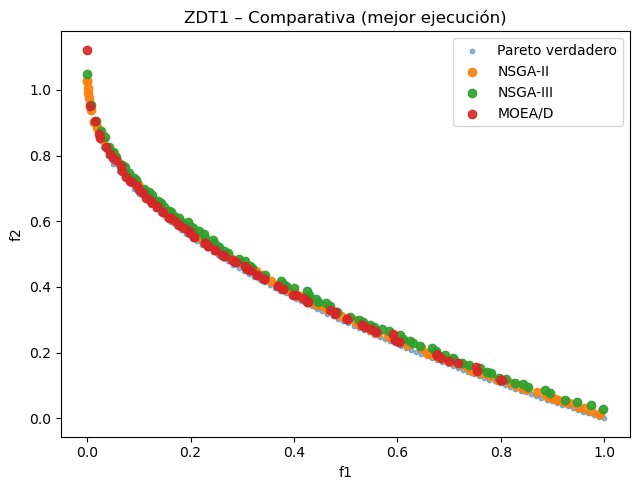

IGD: 0.014202355573684924
Run 1: IGD = 0.014202
IGD: 0.014379524434631585
Run 2: IGD = 0.014380
IGD: 0.012053665137774028
Run 3: IGD = 0.012054
Mejor resultado: Run 3 con IGD = 0.012054

IGD: 0.018256869372066952
Run 1: IGD = 0.018257
IGD: 0.018523854519375146
Run 2: IGD = 0.018524
IGD: 0.019928734500266186
Run 3: IGD = 0.019929
Mejor resultado: Run 1 con IGD = 0.018257

IGD: 0.02491909986709552
Run 1: IGD = 0.024919
IGD: 0.11297167673661136
Run 2: IGD = 0.112972
IGD: 0.01735247130994884
Run 3: IGD = 0.017352
Mejor resultado: Run 3 con IGD = 0.017352



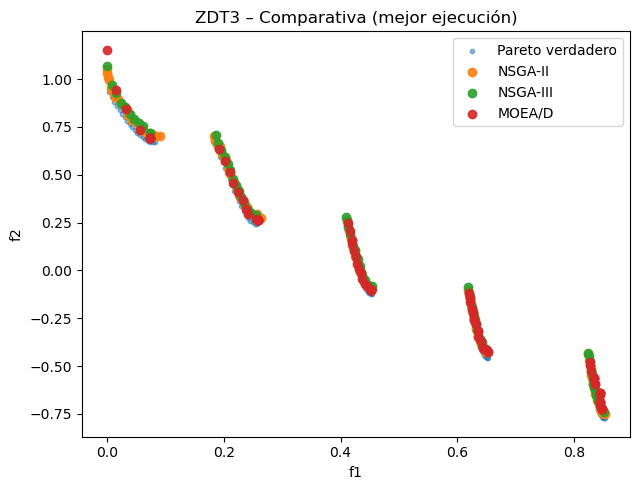

IGD: 0.06887961527494105
Run 1: IGD = 0.068880
IGD: 0.06788083683871399
Run 2: IGD = 0.067881
IGD: 0.07295579635770688
Run 3: IGD = 0.072956
Mejor resultado: Run 2 con IGD = 0.067881

IGD: 0.048690612581037275
Run 1: IGD = 0.048691
IGD: 0.04793497316235857
Run 2: IGD = 0.047935
IGD: 0.048269973879966795
Run 3: IGD = 0.048270
Mejor resultado: Run 2 con IGD = 0.047935

IGD: 0.04959061726070303
Run 1: IGD = 0.049591
IGD: 0.049092013002576616
Run 2: IGD = 0.049092
IGD: 0.04883037060746062
Run 3: IGD = 0.048830
Mejor resultado: Run 3 con IGD = 0.048830



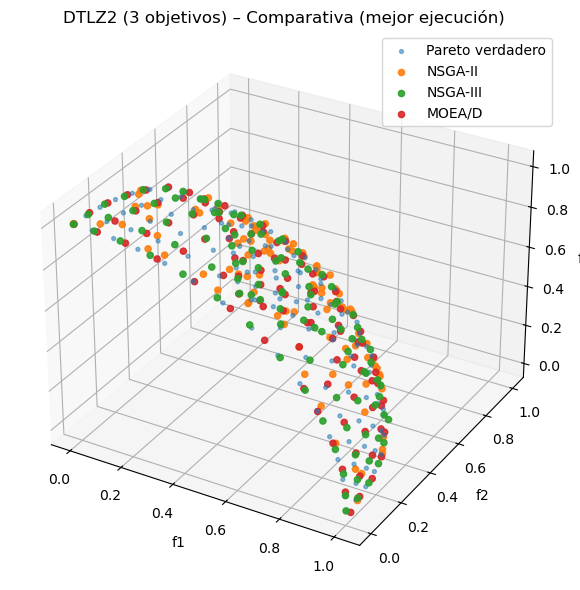

In [3]:
# === Comparativa de frentes: mejor ejecución por algoritmo (robusto a nombres) ===
import matplotlib.pyplot as plt

# 1) Normalizar nombres: crear alias para NSGA-III y MOEA/D según tu script actual
#    (en tu bloque de NSGA-III: res_zdt1/res_zdt3/res_dtlz2 = NSGA-III)
res_zdt1_nsga3 = res_zdt1
res_zdt3_nsga3 = res_zdt3
res_dtlz2_nsga3 = res_dtlz2

#    (en tu bloque de MOEA/D: ya tienes estos nombres)
res_zdt1_moead = res_zdt1_moead
res_zdt3_moead = res_zdt3_moead
res_dtlz2_moead = res_dtlz2_moead

# 2) Asegurar resultados de NSGA-II (pueden haberse sobreescrito antes).
#    Si no existen, recomputamos rápido con tu función NSGAII(...) (pop=100, n_gen=100).
try:
    _ = res_zdt1_nsga2
    _ = res_zdt3_nsga2
    _ = res_dtlz2_nsga2
except NameError:
    res_zdt1_nsga2 = NSGAII(get_problem("zdt1"))
    res_zdt3_nsga2 = NSGAII(get_problem("zdt3"))
    # DTLZ2 en tu código NSGA-II estaba con default (ojo: default puede no ser 3 objetivos)
    # Si quieres estricto 3D, usa: get_problem("dtlz2", n_obj=3)
    res_dtlz2_nsga2 = NSGAII(get_problem("dtlz2", n_obj=3))

# 3) Helper interno para extraer F de la mejor ejecución por IGD
def _best_F(results, problem):
    best_res, _, _ = get_best_result(results, problem)
    _, F = get_X_F(best_res)
    return F

# -------- ZDT1 (2D) --------
plt.figure(figsize=(6.5, 5))
try:
    pf = get_problem("zdt1").pareto_front()
    if pf is not None and len(pf) > 0:
        plt.scatter(pf[:, 0], pf[:, 1], s=10, alpha=0.5, label="Pareto verdadero")
except Exception:
    pass

F_nsga2 = _best_F(res_zdt1_nsga2, get_problem("zdt1"))
F_nsga3 = _best_F(res_zdt1_nsga3, get_problem("zdt1"))
F_moead = _best_F(res_zdt1_moead, get_problem("zdt1"))

plt.scatter(F_nsga2[:, 0], F_nsga2[:, 1], alpha=0.9, label="NSGA-II")
plt.scatter(F_nsga3[:, 0], F_nsga3[:, 1], alpha=0.9, label="NSGA-III")
plt.scatter(F_moead[:, 0], F_moead[:, 1], alpha=0.9, label="MOEA/D")
plt.xlabel("f1"); plt.ylabel("f2"); plt.title("ZDT1 – Comparativa (mejor ejecución)")
plt.legend(); plt.tight_layout(); plt.show()

# -------- ZDT3 (2D) --------
plt.figure(figsize=(6.5, 5))
try:
    pf = get_problem("zdt3").pareto_front()
    if pf is not None and len(pf) > 0:
        plt.scatter(pf[:, 0], pf[:, 1], s=10, alpha=0.5, label="Pareto verdadero")
except Exception:
    pass

F_nsga2 = _best_F(res_zdt3_nsga2, get_problem("zdt3"))
F_nsga3 = _best_F(res_zdt3_nsga3, get_problem("zdt3"))
F_moead = _best_F(res_zdt3_moead, get_problem("zdt3"))

plt.scatter(F_nsga2[:, 0], F_nsga2[:, 1], alpha=0.9, label="NSGA-II")
plt.scatter(F_nsga3[:, 0], F_nsga3[:, 1], alpha=0.9, label="NSGA-III")
plt.scatter(F_moead[:, 0], F_moead[:, 1], alpha=0.9, label="MOEA/D")
plt.xlabel("f1"); plt.ylabel("f2"); plt.title("ZDT3 – Comparativa (mejor ejecución)")
plt.legend(); plt.tight_layout(); plt.show()

# -------- DTLZ2 (3D) --------
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

problem_dtlz2 = get_problem("dtlz2", n_obj=3)
try:
    pf = problem_dtlz2.pareto_front()
    if pf is not None and len(pf) > 0 and pf.shape[1] == 3:
        ax.scatter(pf[:, 0], pf[:, 1], pf[:, 2], s=8, alpha=0.5, label="Pareto verdadero")
except Exception:
    pass

F_nsga2 = _best_F(res_dtlz2_nsga2, problem_dtlz2)
F_nsga3 = _best_F(res_dtlz2_nsga3, problem_dtlz2)
F_moead = _best_F(res_dtlz2_moead, problem_dtlz2)

ax.scatter(F_nsga2[:, 0], F_nsga2[:, 1], F_nsga2[:, 2], alpha=0.9, label="NSGA-II")
ax.scatter(F_nsga3[:, 0], F_nsga3[:, 1], F_nsga3[:, 2], alpha=0.9, label="NSGA-III")
ax.scatter(F_moead[:, 0], F_moead[:, 1], F_moead[:, 2], alpha=0.9, label="MOEA/D")
ax.set_xlabel("f1"); ax.set_ylabel("f2"); ax.set_zlabel("f3")
ax.set_title("DTLZ2 (3 objetivos) – Comparativa (mejor ejecución)")
ax.legend(); plt.tight_layout(); plt.show()